# Knowledge-exploration
## Participants based analysis

# "Reproducibility"
##  Do Not Run Again - just go to 'across the Questions' part

In [15]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

## call the embeddings

In [16]:
# question 1 embedding from distilbert model
emb_1 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer1.jsonl', orient='index')
emb_1 = emb_1[['participant_id', 'embedding1']].rename(columns = {'participant_id': 'index', 'embedding1': 'q1'})

In [17]:
# question 2 embedding from distilbert model
emb_2 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer2.jsonl', orient='index')
emb_2 = emb_2[['participant_id', 'embedding2']].rename(columns = {'participant_id': 'index', 'embedding2': 'q2'})

In [18]:
# question 3 embedding from distilbert model
emb_3 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer3.jsonl', orient='index')
emb_3 = emb_3[['participant_id', 'embedding3']].rename(columns = {'participant_id': 'index', 'embedding3': 'q3'})

In [19]:
# question 4 embedding from distilbert model
emb_4 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer4.jsonl', orient='index')
emb_4 = emb_4[['participant_id', 'embedding4']].rename(columns = {'participant_id': 'index', 'embedding4': 'q4'})

In [20]:
# question 5 embedding from distilbert model
emb_5 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer5.jsonl', orient='index')
emb_5 = emb_5[['participant_id', 'embedding5']].rename(columns = {'participant_id': 'index', 'embedding5': 'q5'})

### Aggregate within the dataframe first and then join together

In [21]:
emb_1.head(5)

,index,q1
0,00278,"[-0.1912737638, -0.1773329824, -0.2605425715, ..."
1,00278,"[-0.0679296777, -0.13514108960000001, -0.13267..."
2,00278,"[-0.1031195149, -0.2114465237, -0.3880674839, ..."
3,00278,"[-0.2258333266, -0.0020551765, -0.049876611700..."
4,00278,"[-0.12228399520000001, 0.0300362222, -0.148336..."


In [22]:
# Group by 'index' and calculate the sum of 'q1_emb'
emb_1 = emb_1.groupby('index')['q1'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_1 = pd.DataFrame(emb_1, columns= ['q1'])
emb_1['index'] = emb_1.index
emb_1 = emb_1.reset_index(drop = True)

In [23]:
emb_1

,q1,index
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13
3,"[-1.1899076254, -0.35361887050000007, -0.62465...",01cb6
4,"[-0.5799569711, -0.7829514518999999, -0.642515...",02670
...,...,...
293,"[-0.8872908205, -0.5147986337, -0.3124759718, ...",f92a4
294,"[-1.0343732499, 0.08551241459999999, -0.777054...",f9fd8
295,"[-0.9605374336, -0.5323074348, -0.226703439899...",fb2a2
296,"[-0.7214982268000001, -0.3550048601, -0.726685...",fb9c4


In [24]:
# Group by 'index' and calculate the sum of 'q2_emb'
emb_2 = emb_2.groupby('index')['q2'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_2 = pd.DataFrame(emb_2, columns= ['q2'])
emb_2['index'] = emb_2.index
emb_2 = emb_2.reset_index(drop = True)

In [25]:
# Group by 'index' and calculate the sum of 'q3_emb'
emb_3 = emb_3.groupby('index')['q3'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_3 = pd.DataFrame(emb_3, columns= ['q3'])
emb_3['index'] = emb_3.index
emb_3 = emb_3.reset_index(drop = True)

In [26]:
# Group by 'index' and calculate the sum of 'q4_emb'
emb_4 = emb_4.groupby('index')['q4'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_4 = pd.DataFrame(emb_4, columns= ['q4'])
emb_4['index'] = emb_4.index
emb_4 = emb_4.reset_index(drop = True)

In [27]:
# Group by 'index' and calculate the sum of 'q5_emb'
emb_5 = emb_5.groupby('index')['q5'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_5 = pd.DataFrame(emb_5, columns= ['q5'])
emb_5['index'] = emb_5.index
emb_5 = emb_5.reset_index(drop = True)

In [28]:
# # check manually if the above code works.

# temp = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
# print(temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas'].to_list())
# instance = temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas']

# sum = 0 
# for i in range(5): 
#     sum += instance[0][i][0]
# sum/5 # This should match with the first element of the emb_1['q1'][0]

## Analysis within question

### Question 1 
"How could we increase vaccination rates in rural areas?"

In [106]:
emb_1['q1'][0].shape

(768,)

In [107]:
matrix = np.vstack(emb_1['q1'].values)
matrix.shape

(298, 768)

In [108]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [110]:
from umap import UMAP

In [111]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [112]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [113]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [114]:
optimal_num_clusters

2

In [115]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

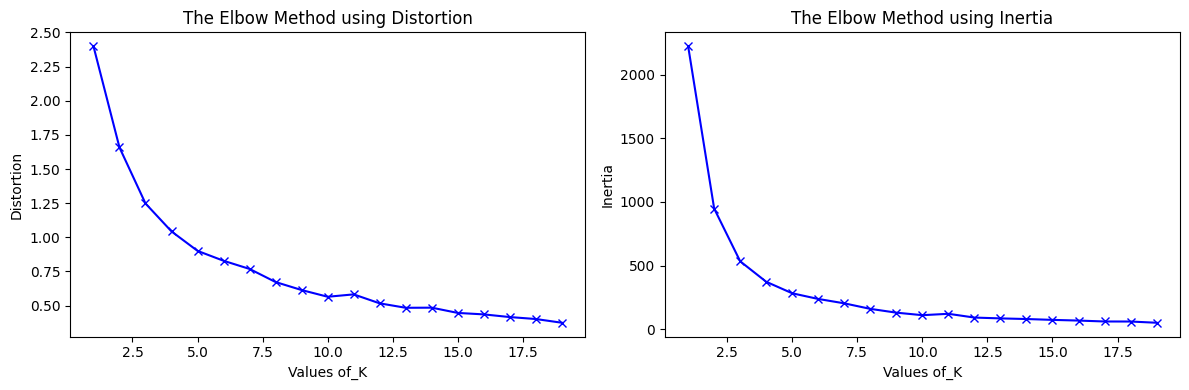

In [116]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [117]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_1['label'] = final_cluster_labels  

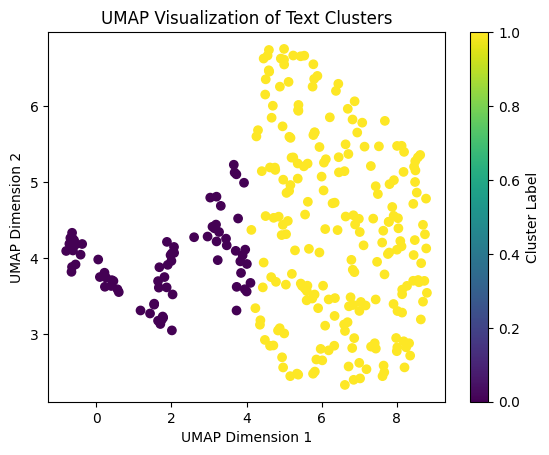

In [118]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [119]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.5090478658676147
Calinski-Harabasz Index: 397.8719556916857
Davies-Bouldin Index: 0.6857298690811928


### Question 2
"How could we improve gender equality at work?"

In [120]:
# convert list to numpy array to make an input to embeddings
emb_2['q2'] = emb_2['q2'].apply(np.array)  
matrix = np.vstack(emb_2['q2'].values)
matrix.shape

(298, 768)

In [121]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [122]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [123]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [124]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [125]:
optimal_num_clusters

2

In [126]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

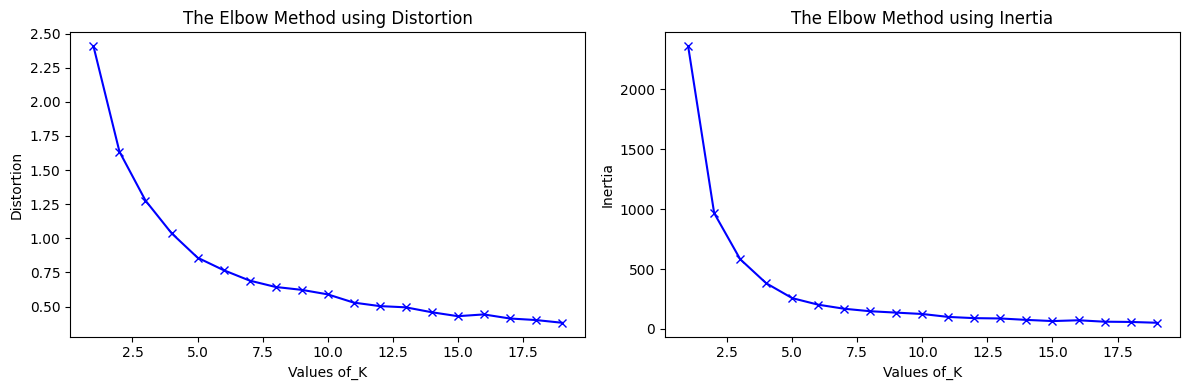

In [127]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [128]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_2['label'] = final_cluster_labels  

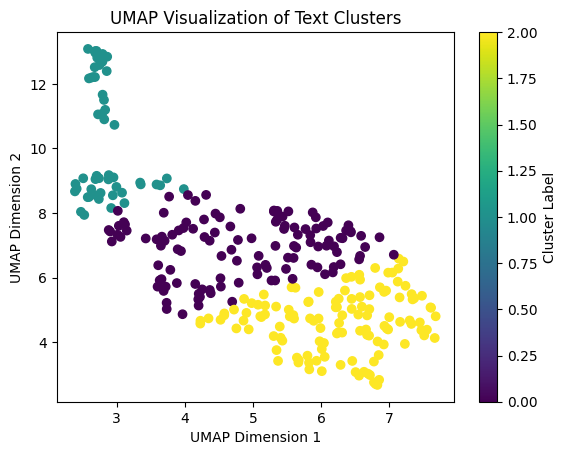

In [129]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [130]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 2\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 2"

Silhouette Coefficient: 0.4057534635066986
Calinski-Harabasz Index: 418.63500196470255
Davies-Bouldin Index: 0.8655777846672827


### Question 3
"How could we prevent the extinction of the elephant?"

In [131]:
# convert list to numpy array to make an input to embeddings
emb_3['q3'] = emb_3['q3'].apply(np.array)  
matrix = np.vstack(emb_3['q3'].values)
matrix.shape

(299, 768)

In [132]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [133]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [134]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [135]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [136]:
optimal_num_clusters

2

In [137]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

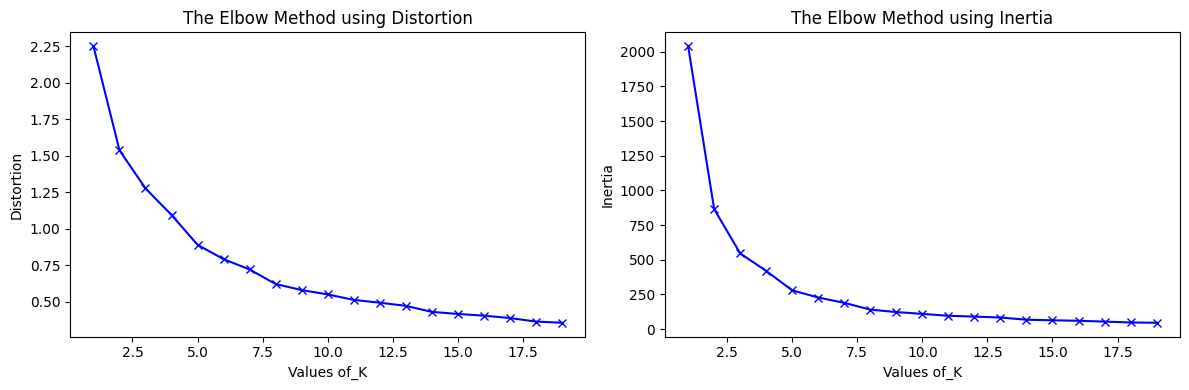

In [138]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [139]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_3['label'] = final_cluster_labels  

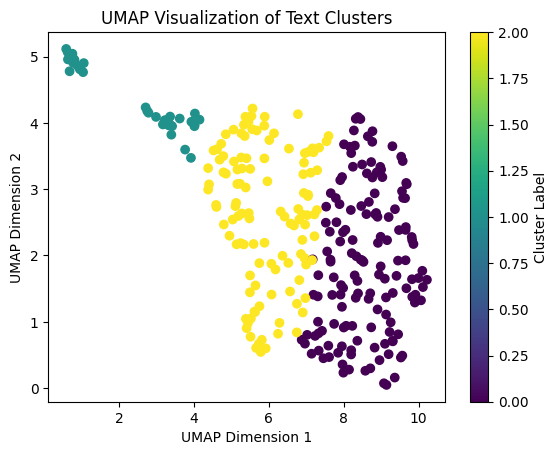

In [140]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [141]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 3\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 3"

Silhouette Coefficient: 0.4240295886993408
Calinski-Harabasz Index: 405.0139610895514
Davies-Bouldin Index: 0.8275712234861229


### Question 4
"How could we increase the use of public transport?"

In [142]:
# convert list to numpy array to make an input to embeddings
emb_4['q4'] = emb_4['q4'].apply(np.array)  
matrix = np.vstack(emb_4['q4'].values)
matrix.shape

(296, 768)

In [143]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [144]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [145]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [146]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [147]:
optimal_num_clusters

2

In [148]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

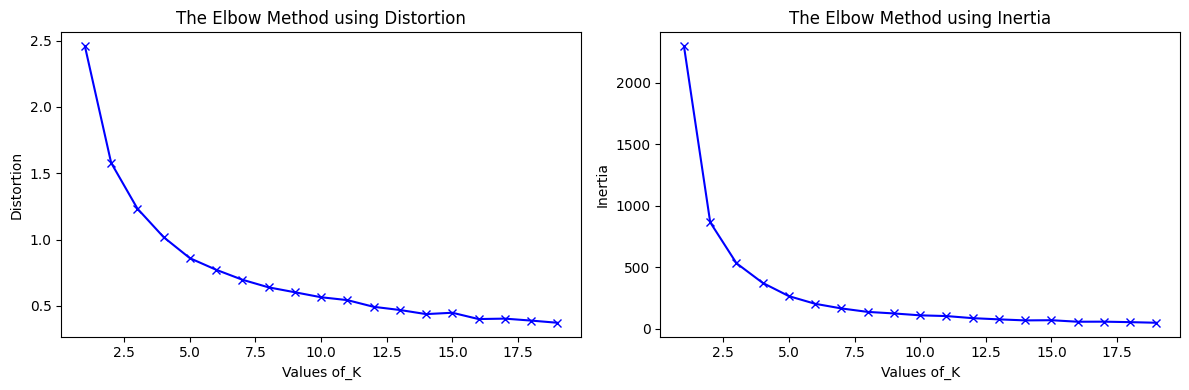

In [149]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [150]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_4['label'] = final_cluster_labels  

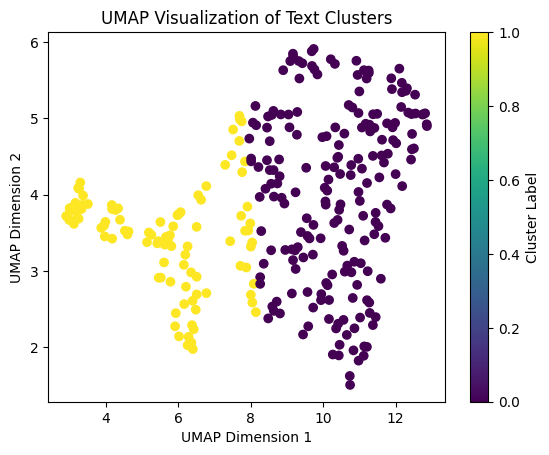

In [151]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [152]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 4\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 4"

Silhouette Coefficient: 0.5212512016296387
Calinski-Harabasz Index: 482.1261636166976
Davies-Bouldin Index: 0.665465566531093


### Question 5
"How could we reduce stress in our society?"

In [153]:
# convert list to numpy array to make an input to embeddings
emb_5['q5'] = emb_5['q5'].apply(np.array)  
matrix = np.vstack(emb_5['q5'].values)
matrix.shape

(298, 768)

In [154]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [155]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [156]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [157]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [158]:
optimal_num_clusters

2

In [159]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

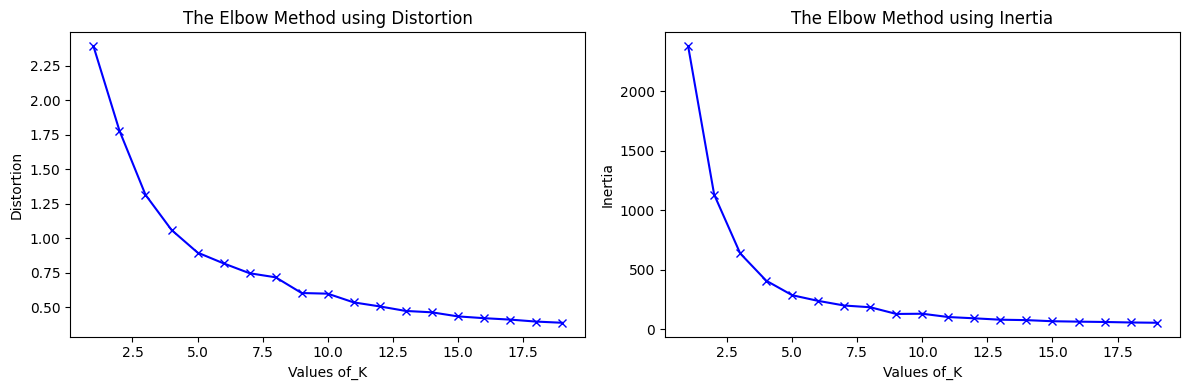

In [160]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [161]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=5, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_5['label'] = final_cluster_labels  

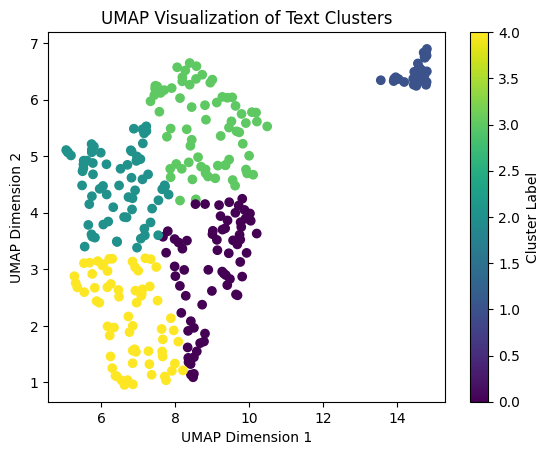

In [162]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [163]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 5\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 5"

Silhouette Coefficient: 0.42139363288879395
Calinski-Harabasz Index: 495.4233936884996
Davies-Bouldin Index: 0.7124425482323731


## Prepare the concatenated dataframe and save it to file

In [164]:
emb_1.head(3)

,q1,index,label
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278,1
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d,1
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13,1


In [231]:
embs = pd.concat([emb_1.set_index('index'), 
                  emb_2.set_index('index'), 
                  emb_3.set_index('index'), 
                  emb_4.set_index('index'), 
                  emb_5.set_index('index')], 
                  axis = 1, join = 'inner')
embs.index

Index(['00278', '0068d', '00f13', '01cb6', '02670', '06419', '07089', '08238',
       '0a0eb', '0ac65',
       ...
       'f4bc7', 'f4fb5', 'f6145', 'f8e64', 'f9101', 'f92a4', 'f9fd8', 'fb2a2',
       'fb9c4', 'ff2bf'],
      dtype='object', name='index', length=290)

In [233]:
embs.head(3)

,q1,label,q2,label,q3,label,q4,label,q5,label
index,,,,,,,,,,
00278,"[-0.7104402782, -0.4959395499999999, -0.979493...",1,"[-1.2141312807, -0.3966640457, -1.041425444200...",0,"[-0.7340224422, -0.3061131761, -0.756310321400...",2,"[-0.7028733343000001, -0.5303636864000001, -0....",0,"[-0.988017559, -0.51460783, -0.523574616800000...",0
0068d,"[-0.3586821751, -0.15381824970000002, -0.82275...",1,"[-0.5131815745, 0.03307634779999999, -1.231779...",2,"[-0.9260629415, -0.31008225300000003, -0.79693...",2,"[-0.5791567899, -0.5247273557000001, -0.035114...",0,"[-0.3682377925, -0.5639116094000001, -0.476926...",2
00f13,"[-0.8142896731, -0.8274497016000002, -0.467351...",1,"[-1.3075574189, -0.6642389744000001, -0.764599...",0,"[-1.1262988449, -0.327856335, -1.5954943002000...",0,"[-0.8681718513000001, -0.49448729300000005, 0....",0,"[-1.2099347115, -0.5444229883999999, -0.759294...",2


### Losing indices 
Why only 290 left? Because the dataframes miss different participants. So it gets reduced to more than the maximum missing number of each dataframe.

In [234]:
# make the json strings for the reading later

embs_save = embs.copy()
embs_save['q1'] = embs_save['q1'].apply(lambda x: x.tolist())
embs_save['q2'] = embs_save['q2'].apply(lambda x: x.tolist())
embs_save['q3'] = embs_save['q3'].apply(lambda x: x.tolist())
embs_save['q4'] = embs_save['q4'].apply(lambda x: x.tolist())
embs_save['q5'] = embs_save['q5'].apply(lambda x: x.tolist())

In [235]:
# save it to csv
embs_save.to_csv('~/thesis/data/processed_data/knowledge_participants-embeddings-labels.csv')  

# Analysis across the questions

In [29]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

### call the dataframe that are created before

In [30]:
embs = pd.read_csv('~/thesis/data/processed_data/knowledge_participants-embeddings-labels.csv')

In [31]:
embs.index = embs['index']

### Sum the vector across the questions

In [32]:
embs_whole = embs.copy().drop(columns = ['index'])
embs = embs[['q1', 'q2', 'q3','q4', 'q5']]

In [33]:
# Convert all columns back to np.array
embs = embs.applymap(lambda x: np.array(eval(x)))

In [34]:
# get the summed embeddings of all questions
embs_flat = embs.apply(lambda x: np.sum(x, axis=0), axis=1)

In [35]:
# convert list to numpy array to make an input to embeddings
embs_flat = embs_flat.apply(np.array)  
print(type(embs_flat.values[0]))
matrix = np.vstack(embs_flat.values)
matrix.shape

<class 'numpy.ndarray'>


(290, 768)

In [36]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [37]:
from umap import UMAP
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [38]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [39]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [40]:
optimal_num_clusters

3

In [41]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

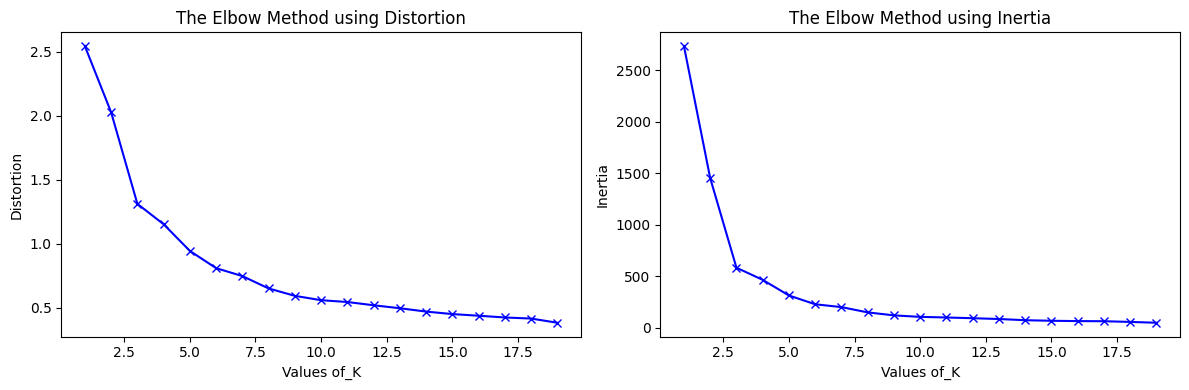

In [42]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [43]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
embs_flat['label'] = final_cluster_labels  

In [44]:
embs_flat

index
00278    [-4.3494848944, -2.2436882882, -3.537346059500...
0068d    [-2.7453212735, -1.5194631200000002, -3.363514...
00f13    [-5.3262524997, -2.8584552924000004, -3.545521...
01cb6    [-5.7479867163, -2.5037862596, -1.771659113800...
02670    [-3.7600085102000005, -2.3036371118, -4.094128...
                               ...                        
f9fd8    [-4.7641997171, -0.9816372485000001, -4.319038...
fb2a2    [-3.4283834173, -2.1057886908000003, -2.005938...
fb9c4    [-4.2894586756, -2.3346943556, -4.6944111451, ...
ff2bf    [-3.0257290089, -1.5156525802, -2.776052515, -...
label    [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, ...
Length: 291, dtype: object

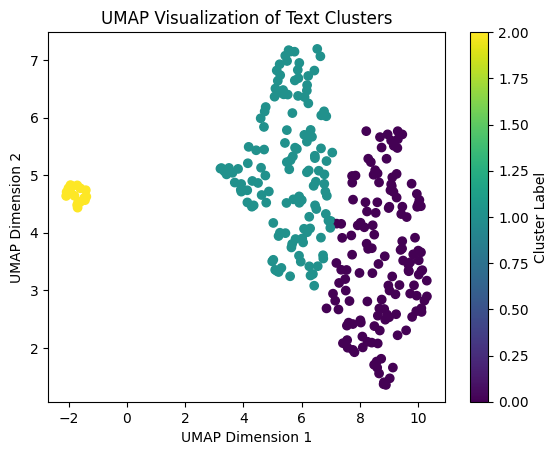

In [45]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [46]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Across the questions\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Across the questions"

Silhouette Coefficient: 0.5244417190551758
Calinski-Harabasz Index: 528.051347654555
Davies-Bouldin Index: 0.5887437268470227


**Result of the analysis across the questions**
* Data: vector sum of embeddings
1. Clustering sparse between.
2. 3 clustering retrieved. 


## DataFrame about each participant_id and cluster_label by question

### Participants and cluster labels

In [47]:
# get the embeddings and the labels saved file
embs = embs_whole.copy()

In [48]:
# rename the column, drop unnecessary columns
embs.columns = ['q1_emb', 'q1', 'q2_emb', 'q2', 'q3_emb', 'q3', 'q4_emb', 'q4', 'q5_emb', 'q5']
embs = embs.drop(['q1_emb', 'q2_emb', 'q3_emb', 'q4_emb', 'q5_emb'], axis = 1)
embs

,q1,q2,q3,q4,q5
index,,,,,
00278,1,0,2,0,0
0068d,1,2,2,0,2
00f13,1,0,0,0,2
01cb6,1,0,0,0,2
02670,1,2,0,0,4
...,...,...,...,...,...
f92a4,0,0,2,0,2
f9fd8,1,1,2,0,4
fb2a2,1,1,2,0,2


The dataframe shows the cluster label that the participant possesses for each question. 

### Adjacency matrix

### * Warning : run it when you need it below two cells - untoggle

In [49]:
# # Function to create an adjacency matrix
# import numpy as np 

# def create_adjacency_matrix(df):
#     num_participants = len(df.index)
#     adjacency_matrix = np.zeros((num_participants, num_participants), dtype=int)

#     for i, participant1 in enumerate(df.index):
#         for j, participant2 in enumerate(df.index):
#             common_clusters = (df.loc[participant1] == df.loc[participant2]).sum()
#             adjacency_matrix[i, j] = common_clusters

#     return pd.DataFrame(adjacency_matrix, index=df.index, columns=df.index)

# adjacency_matrix = create_adjacency_matrix(embs)
# print(adjacency_matrix)

In [50]:
# # Save the adjancency matrix to the csv file
# adjacency_matrix.to_csv('~/thesis/data/processed_data/knowledge-adjacency_matrix.csv')  

## NetworkX - adjacency matrix to graph -> "on hold"

In [51]:
import networkx as nx

In [52]:
adjacency_matrix = pd.read_csv('~/thesis/data/processed_data/knowledge-adjacency_matrix.csv', index_col = 0)

In [53]:
adjacency_matrix.head()

,00278,0068d,00f13,01cb6,02670,06419,07089,08238,0a0eb,0ac65,...,f4bc7,f4fb5,f6145,f8e64,f9101,f92a4,f9fd8,fb2a2,fb9c4,ff2bf
index,,,,,,,,,,,,,,,,,,,,,
00278,5,3,3,3,2,4,4,4,4,2,...,4,3,2,2,3,3,3,3,2,0
0068d,3,5,3,3,3,4,4,3,3,4,...,2,3,1,1,2,3,3,4,4,0
00f13,3,3,5,5,3,4,2,3,3,4,...,4,1,0,1,2,3,2,3,4,0
01cb6,3,3,5,5,3,4,2,3,3,4,...,4,1,0,1,2,3,2,3,4,0
02670,2,3,3,3,5,2,3,2,3,4,...,3,2,0,0,1,1,3,2,4,0


In [55]:
G = nx.Graph()

for row, col in adjacency_matrix.iterrows():
    for node, weight in col.items():
        if weight != 0:
            G.add_edge(row, node, weight=weight)


In [56]:
# pos = nx.kamada_kawai_layout(G)  # Position nodes using a spring layout (you can choose other layout methods)

# nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=5, font_color='black', font_weight='bold')

# edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=5)

# plt.title("Your Graph")
# plt.show()


## Detect Communities
### Louvain method

The Louvain method for community detection is a method to extract non-overlapping communities from large networks. The method is a greedy optimization method that appears to run in time O(n * log n) where n is the number of nodes in the network.

In [57]:
import community # This is python-louvain library
from networkx.algorithms.community import greedy_modularity_communities

In [58]:
G = nx.Graph(adjacency_matrix)

partition = nx.community.louvain_communities(G, seed = 42) # setting the random_state to 0 to deter it changes in repetition

# Create a dictionary with the value of empty list. 
keys = [i for i in range(len(partition))]
communities = {key: [] for key in keys}

num = 0
for part in partition:
    communities[num] = part
    num += 1

In [59]:
# how many communities there are? 
len(communities)

3

In [60]:
len(communities[0])

122

In [61]:
len(communities[1])

94

In [62]:
len(communities[2])

74

### Idea community detection

1) Plot the histogram of the demographic traits for each community and visually compare them 
2) Calculate the median of the numerical variables

### Variable interpretation
Refer to the file from the gitlab 'Variable_coding'

https://arc-git.mpib-berlin.mpg.de/poltools/knowledge_exploration/study_1/-/blob/dev/Variable_coding?ref_type=heads

### Demographic variables calling

In [63]:
# call the original data again
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [64]:
df.head(3)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."


In [65]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [66]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [67]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/tmp/ipykernel_3962615/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


### Age

In [68]:
age = demos['AGE']

In [69]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [70]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.86666666666667
variance of age: 244.02888888888884
standard deviation of age: 15.621424035243678


In [71]:
# Dataframe age with each communities
age_0 = age.loc[list(communities[0])]
age_1 = age.loc[list(communities[1])]
age_2 = age.loc[list(communities[2])]

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))


*community_0 in age
how many: 122
mean: 45.10655737704918
variance: 242.3902848696587
std: 15.568888363324426

*community_1 in age 
how many: 94
mean: 46.851063829787236
variance: 248.08420099592578
std: 15.750688905439208

*community_2 in age 
how many: 74
mean: 46.0
variance: 232.3783783783784
std: 15.24396203020653


(array([ 4.,  4.,  7.,  5.,  6.,  5.,  3.,  5.,  2.,  5.,  5.,  4.,  5.,
         2.,  4.,  1.,  9.,  3.,  3.,  8., 10.,  3.,  5.,  5.,  4.,  1.,
         3.,  0.,  0.,  1.]),
 array([19.        , 20.96666667, 22.93333333, 24.9       , 26.86666667,
        28.83333333, 30.8       , 32.76666667, 34.73333333, 36.7       ,
        38.66666667, 40.63333333, 42.6       , 44.56666667, 46.53333333,
        48.5       , 50.46666667, 52.43333333, 54.4       , 56.36666667,
        58.33333333, 60.3       , 62.26666667, 64.23333333, 66.2       ,
        68.16666667, 70.13333333, 72.1       , 74.06666667, 76.03333333,
        78.        ]),
 <BarContainer object of 30 artists>)

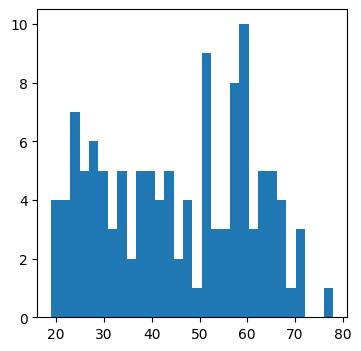

In [72]:
# it is the example below, use to see another community as well.
# Histogram of age in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(age_0, bins = 30)

### Gender

In [73]:
gender = demos['GENDER']
gender = gender.dropna()
gender

PARTICIPANT_ID
00278    1
0068d    1
00f13    1
01cb6    3
02670    1
        ..
f92a4    1
f9fd8    1
fb2a2    1
fb9c4    1
ff2bf    1
Name: GENDER, Length: 300, dtype: int64

In [74]:
# Dataframe gender with each communities
gender_0 = gender.loc[list(communities[0])]
gender_1 = gender.loc[list(communities[1])]
gender_2 = gender.loc[list(communities[2])]

print("How many in gender belong to community 0:", len(gender_0))
print("How many in gender belong to community 1:", len(gender_1))
print("How many in gender belong to community 2:", len(gender_2))

How many in gender belong to community 0: 122
How many in gender belong to community 1: 94
How many in gender belong to community 2: 74


(array([56.,  0.,  1.,  0., 64.,  0.,  0.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

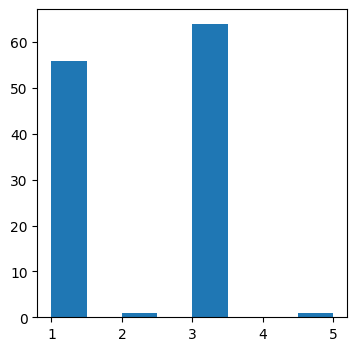

In [75]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_0, bins = 8)

(array([57.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

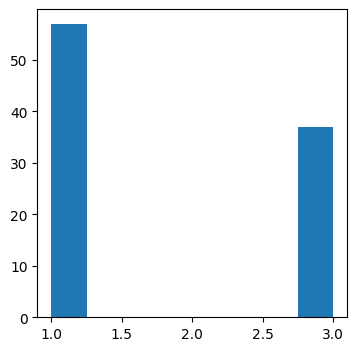

In [76]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_1, bins = 8)

(array([35.,  0.,  0.,  0.,  0.,  0.,  0., 39.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

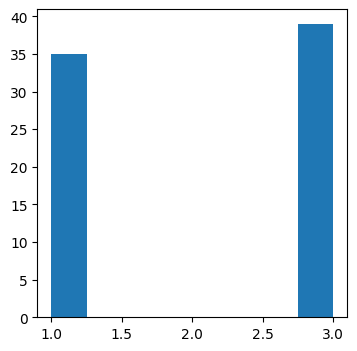

In [77]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_2, bins = 8)

### Ideology political

In [78]:
politics = demos['POLITICAL']
politics = politics.dropna()
politics

PARTICIPANT_ID
00278    2
0068d    4
00f13    3
01cb6    1
02670    2
        ..
f92a4    3
f9fd8    2
fb2a2    3
fb9c4    2
ff2bf    4
Name: POLITICAL, Length: 300, dtype: int64

In [79]:
# Dataframe political ideology with each communities
politics_0 = politics.loc[list(communities[0])]
politics_1 = politics.loc[list(communities[1])]
politics_2 = politics.loc[list(communities[2])]

print("How many in politics belong to community 0:", len(politics_0))
print("How many in politics belong to community 1:", len(politics_1))
print("How many in politics belong to community 2:", len(politics_2))

How many in politics belong to community 0: 122
How many in politics belong to community 1: 94
How many in politics belong to community 2: 74


(array([17.,  0., 43.,  0., 46.,  0., 12.,  4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

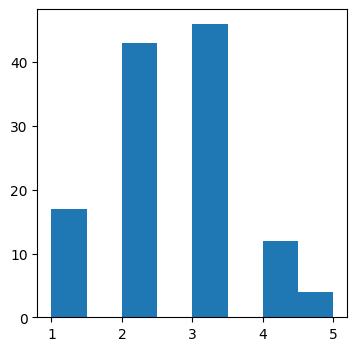

In [80]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_0, bins = 8)

(array([ 9.,  0., 28.,  0., 40.,  0., 14.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

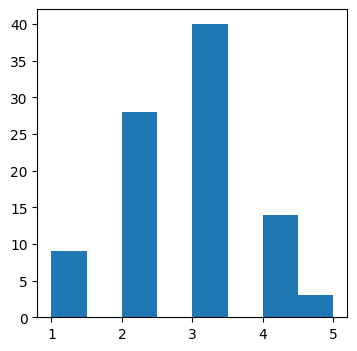

In [81]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_1, bins = 8)

(array([ 5.,  0., 26.,  0., 31.,  0., 10.,  2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

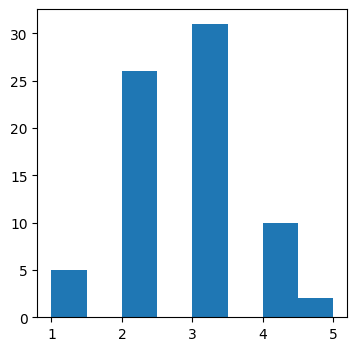

In [82]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_2, bins = 8)

### Education 

In [83]:
demos.columns.tolist()

['AGE',
 'GENDER',
 'EDUCATION',
 'EMPLOYMENT',
 'INCOME',
 'POLITICAL',
 'DAT',
 'CRT2']

In [84]:
education = demos['EDUCATION']

In [85]:
education = education.dropna()
education

PARTICIPANT_ID
00278    5
0068d    2
00f13    4
01cb6    2
02670    5
        ..
f92a4    5
f9fd8    4
fb2a2    2
fb9c4    4
ff2bf    2
Name: EDUCATION, Length: 300, dtype: int64

In [86]:
# Dataframe political ideology with each communities
education_0 = education.loc[list(communities[0])]
education_1 = education.loc[list(communities[1])]
education_2 = education.loc[list(communities[2])]

print("How many in education belong to community 0:", len(education_0))
print("How many in education belong to community 1:", len(education_1))
print("How many in education belong to community 2:", len(education_2))


How many in education belong to community 0: 122
How many in education belong to community 1: 94
How many in education belong to community 2: 74


(array([26.,  0., 15.,  0., 52.,  0., 28.,  1.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 8 artists>)

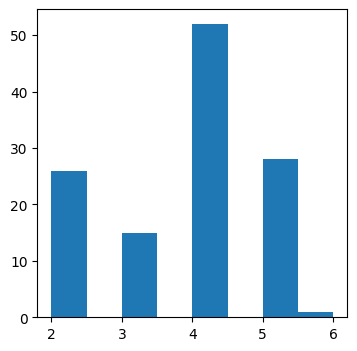

In [87]:
# it is the example below, use to see another community as well.
# Histogram of education in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(education_0, bins = 8)

### Employment

In [88]:
demos['EMPLOYMENT']

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [89]:
employment = demos['EMPLOYMENT'].dropna()
employment

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [90]:
# Dataframe political ideology with each communities
employment_0 = employment.loc[list(communities[0])]
employment_1 = employment.loc[list(communities[1])]
employment_2 = employment.loc[list(communities[2])]

print("How many in employment belong to community 0:", len(employment_0))
print("How many in employment belong to community 1:", len(employment_1))
print("How many in employment belong to community 2:", len(employment_2))


How many in employment belong to community 0: 122
How many in employment belong to community 1: 94
How many in employment belong to community 2: 74


(array([49., 20.,  8.,  0., 12.,  5.,  0.,  4., 17.,  7.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

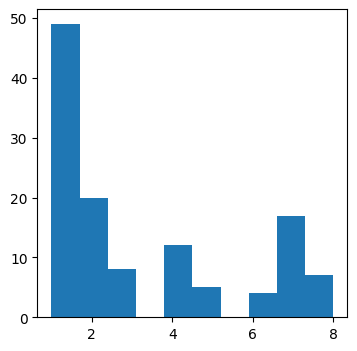

In [91]:
# it is the example below, use to see another community as well.
# Histogram of employment in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(employment_0, bins = 10)

### Income

In [92]:
income = demos['INCOME'].dropna()

In [93]:
# Dataframe political ideology with each communities
income_0 = income.loc[list(communities[0])]
income_1 = income.loc[list(communities[1])]
income_2 = income.loc[list(communities[2])]

print("How many in income belong to community 0:", len(income_0))
print("How many in income belong to community 1:", len(income_1))
print("How many in income belong to community 2:", len(income_2))


How many in income belong to community 0: 122
How many in income belong to community 1: 94
How many in income belong to community 2: 74


(array([28.,  0., 45.,  0., 21.,  0., 22.,  6.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

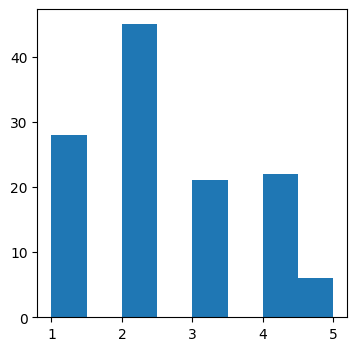

In [94]:
# it is the example below, use to see another community as well.
# Histogram of income in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(income_0, bins = 8)

### DAT - how divergent the participant can think

In [95]:
dat = demos['DAT'].dropna()

In [96]:
# Dataframe political ideology with each communities
dat_0 = dat.loc[list(communities[0])]
dat_1 = dat.loc[list(communities[1])]
dat_2 = dat.loc[list(communities[2])]

print("How many in DAT belong to community 0:", len(dat_0))
print("How many in DAT belong to community 1:", len(dat_1))
print("How many in DAT belong to community 2:", len(dat_2))


How many in DAT belong to community 0: 122
How many in DAT belong to community 1: 94
How many in DAT belong to community 2: 74


(array([ 3.,  2.,  7., 22., 29., 34., 19.,  6.]),
 array([59.29313146, 63.5568003 , 67.82046915, 72.08413799, 76.34780684,
        80.61147568, 84.87514453, 89.13881337, 93.40248222]),
 <BarContainer object of 8 artists>)

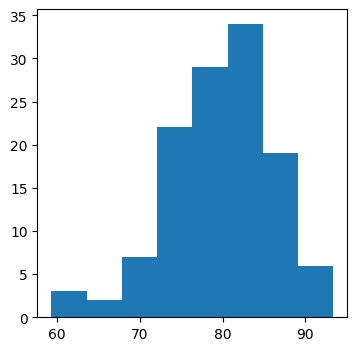

In [97]:
# it is the example below, use to see another community as well.
# Histogram of DAT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(dat_0, bins = 8)

### CRT - how creative the participant can think

In [98]:
crt = demos['CRT2'].dropna()

In [99]:
# Dataframe political ideology with each communities
crt_0 = crt.loc[list(communities[0])]
crt_1 = crt.loc[list(communities[1])]
crt_2 = crt.loc[list(communities[2])]

print("How many in CRT belong to community 0:", len(crt_0))
print("How many in CRT belong to community 1:", len(crt_1))
print("How many in CRT belong to community 2:", len(crt_2))


How many in CRT belong to community 0: 122
How many in CRT belong to community 1: 94
How many in CRT belong to community 2: 74


(array([ 3.,  0., 10.,  0., 22.,  0., 59., 28.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

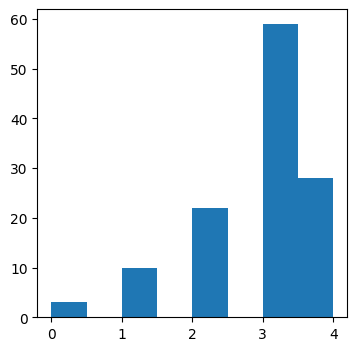

In [100]:
# it is the example below, use to see another community as well.
# Histogram of CRT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(crt_0, bins = 8)

## Visualize multiple graph

In [101]:
# Display graphs grouped by the community label
import matplotlib.pyplot as plt

# List of data for each plot
data_0 = [age_0, gender_0, education_0, employment_0, income_0, politics_0, dat_0, crt_0]
data_1 = [age_1, gender_1, education_1, employment_1, income_1, politics_1, dat_1, crt_1]
data_2 = [age_2, gender_2, education_2, employment_2, income_2, politics_2, dat_2, crt_2]

### Community 0



*The number of the community members: 122


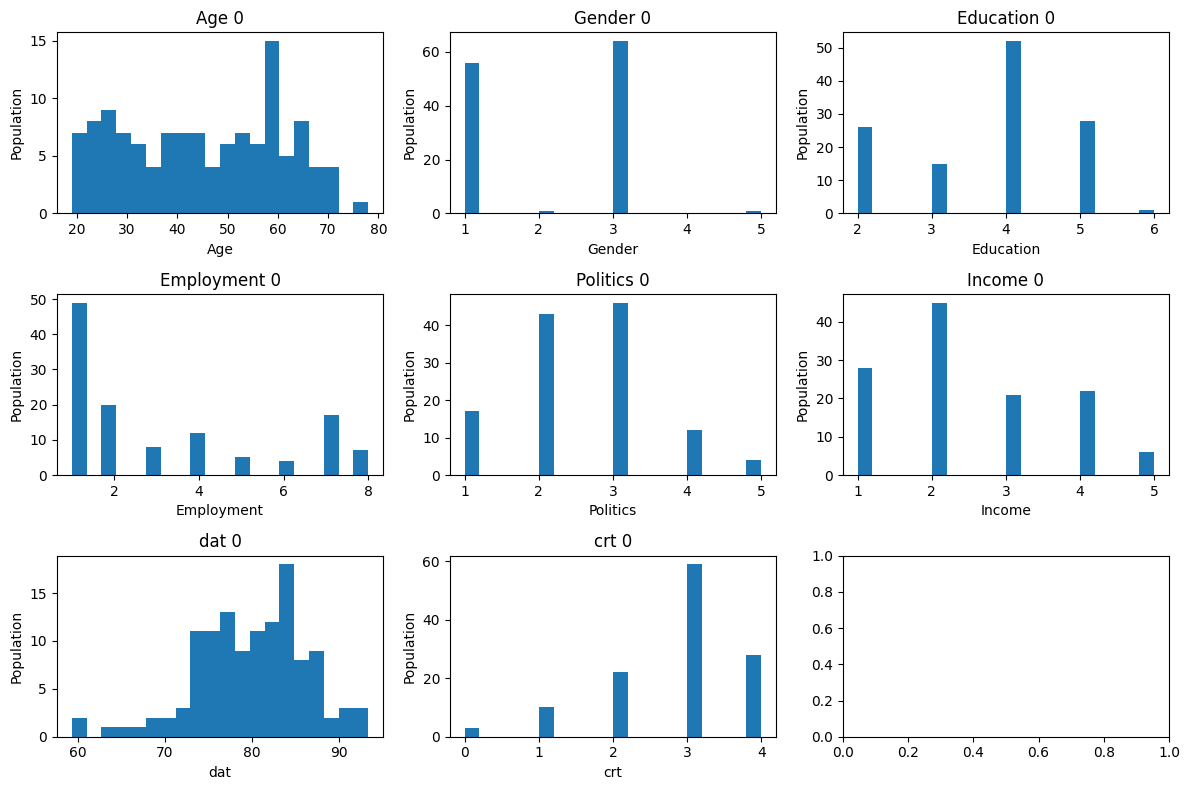

In [102]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_0, bins=20)
axes[0, 0].set_title('Age 0')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_0, bins=20)
axes[0, 1].set_title('Gender 0')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_0, bins=20)
axes[0, 2].set_title('Education 0')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_0, bins=20)
axes[1, 0].set_title('Employment 0')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_0, bins=20)
axes[1, 1].set_title('Politics 0')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_0, bins=20)
axes[1, 2].set_title('Income 0')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 0].hist(dat_0, bins=20)
axes[2, 0].set_title('dat 0')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_0, bins=20)
axes[2, 1].set_title('crt 0')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[0]))

# Show the combined plots
plt.show()


### community 1



*The number of the community members: 94


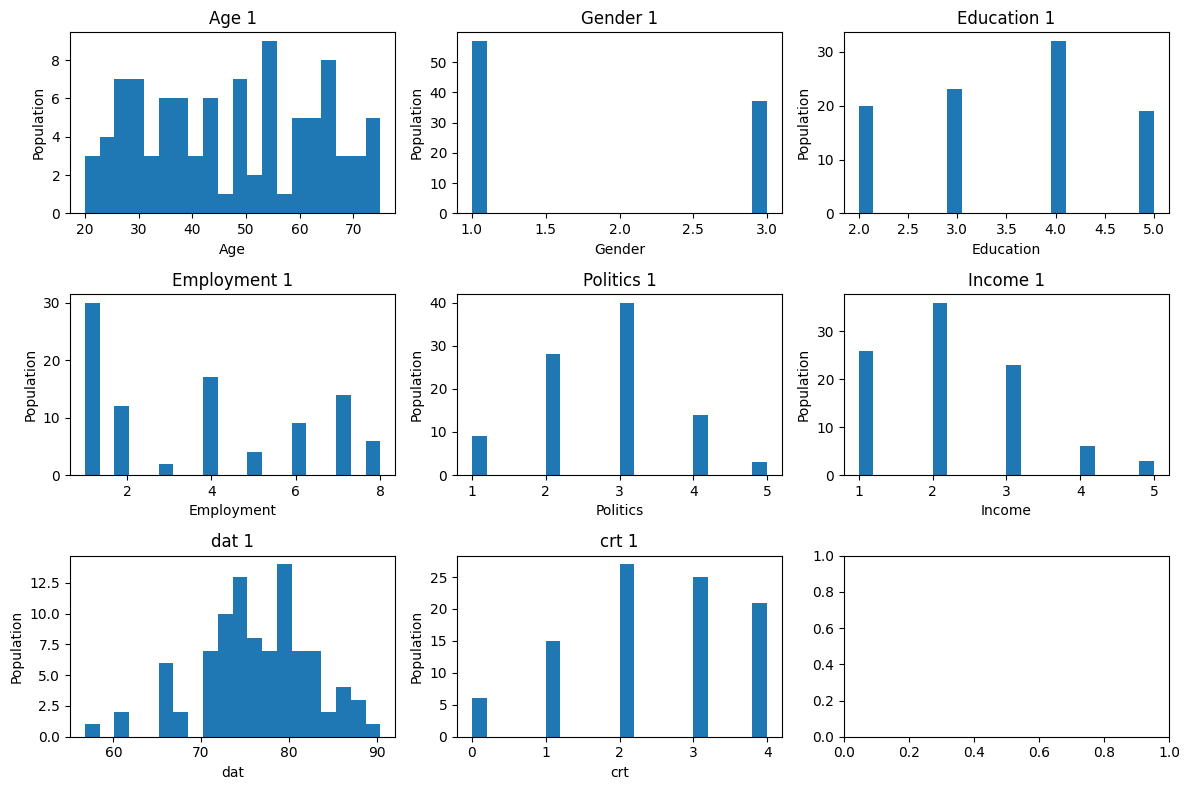

In [103]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_1, bins=20)
axes[0, 0].set_title('Age 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_1, bins=20)
axes[0, 1].set_title('Gender 1')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_1, bins=20)
axes[0, 2].set_title('Education 1')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_1, bins=20)
axes[1, 0].set_title('Employment 1')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_1, bins=20)
axes[1, 1].set_title('Politics 1')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_1, bins=20)
axes[1, 2].set_title('Income 1')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_1, bins=20)
axes[2, 0].set_title('dat 1')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_1, bins=20)
axes[2, 1].set_title('crt 1')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[1]))

# Show the combined plots
plt.show()


* dat1: compared to the community 0, it is more evenly distributed. 

### community 2



*The number of the community members: 74


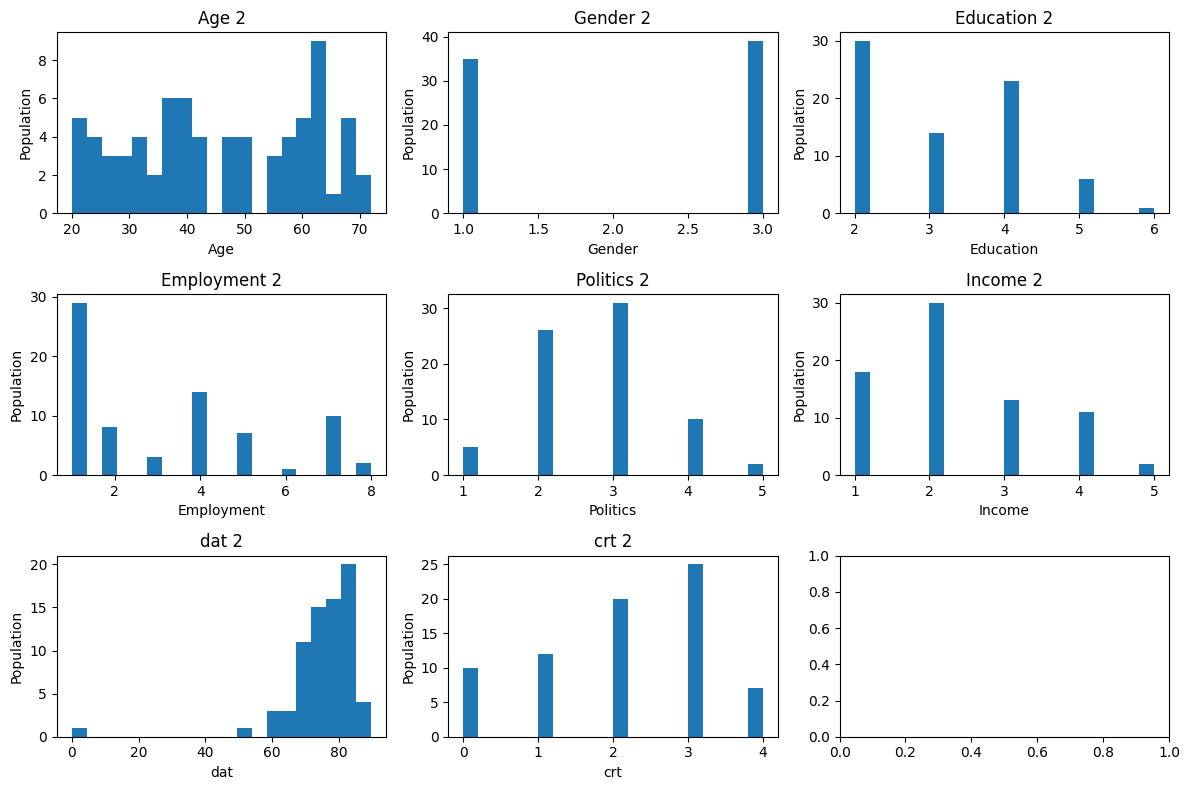

In [104]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_2, bins=20)
axes[0, 0].set_title('Age 2')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_2, bins=20)
axes[0, 1].set_title('Gender 2')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_2, bins=20)
axes[0, 2].set_title('Education 2')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_2, bins=20)
axes[1, 0].set_title('Employment 2')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_2, bins=20)
axes[1, 1].set_title('Politics 2')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_2, bins=20)
axes[1, 2].set_title('Income 2')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_2, bins=20)
axes[2, 0].set_title('dat 2')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_2, bins=20)
axes[2, 1].set_title('crt 2')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[2]))

# Show the combined plots
plt.show()


* **REFsource** : interpreting the clustering results.

https://developers.google.com/machine-learning/clustering/interpret


### ANOVA for the continuous variable
Assumptions: ANOVA assumes homogeneity of variances (similar variances in groups), normal distribution of residuals, and independence of observations.

check if the data are approximately normally distributed within each cluster and if the variances across clusters are roughly equal.

**age**

In [105]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

*community_0 in age
how many: 122
mean: 45.10655737704918
variance: 242.3902848696587
std: 15.568888363324426

*community_1 in age 
how many: 94
mean: 46.851063829787236
variance: 248.08420099592578
std: 15.750688905439208

*community_2 in age 
how many: 74
mean: 46.0
variance: 232.3783783783784
std: 15.24396203020653


* ANOVA requires homogeneous variance -> Levene's test for the verification.

**DAT**

In [106]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in dat")
print("how many:", len(dat_0))
print("mean:", np.mean(dat_0))
print("variance:", np.var(dat_0))
print("std:", np.std(dat_0))

# community_1
print("\n*community_1 in dat ")
print("how many:", len(dat_1))
print("mean:", np.mean(dat_1))
print("variance:", np.var(dat_1))
print("std:", np.std(dat_1))

# community_2
print("\n*community_2 in dat ")
print("how many:", len(dat_2))
print("mean:", np.mean(dat_2))
print("variance:", np.var(dat_2))
print("std:", np.std(dat_2))

*community_0 in dat
how many: 122
mean: 79.8564914389549
variance: 40.88021282160944
std: 6.393763588185712

*community_1 in dat 
how many: 94
mean: 76.44447419440819
variance: 39.66329268588117
std: 6.2978800152020336

*community_2 in dat 
how many: 74
mean: 75.25806443593758
variance: 131.5276143796082
std: 11.468548922143908


**CRT**

In [107]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in crt")
print("how many:", len(crt_0))
print("mean:", np.mean(crt_0))
print("variance:", np.var(crt_0))
print("std:", np.std(crt_0))

# community_1
print("\n*community_1 in crt ")
print("how many:", len(crt_1))
print("mean:", np.mean(crt_1))
print("variance:", np.var(crt_1))
print("std:", np.std(crt_1))

# community_2
print("\n*community_2 in crt ")
print("how many:", len(crt_2))
print("mean:", np.mean(crt_2))
print("variance:", np.var(crt_2))
print("std:", np.std(crt_2))

*community_0 in crt
how many: 122
mean: 2.8114754098360657
variance: 0.9234748723461437
std: 0.9609759998804047

*community_1 in crt 
how many: 94
mean: 2.425531914893617
variance: 1.3933906745133546
std: 1.1804197026961871

*community_2 in crt 
how many: 74
mean: 2.0945945945945947
variance: 1.4099707815924032
std: 1.1874219054710096


### Levene's test

In [108]:
import scipy.stats as stats

In [109]:
# Age

# Assuming you have your data in separate groups
age_0
age_1
age_2

# Perform Levene's test
statistic, p_value = stats.levene(age_0, age_1, age_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.03326364666155232
P-value: 0.9672872334975503
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [110]:
# dat

# Assuming you have your data in separate groups
dat_0
dat_1
dat_2

# Perform Levene's test
statistic, p_value = stats.levene(dat_0, dat_1, dat_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 2.523364204196442
P-value: 0.08196729449224077
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [111]:
# crt

# Assuming you have your data in separate groups
crt_0
crt_1
crt_2

# Perform Levene's test
statistic, p_value = stats.levene(crt_0, crt_1, crt_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 7.307469335785539
P-value: 0.0008027281821850997
Reject the null hypothesis. There is evidence of unequal variances.


### ANOVA

In [ ]:
from scipy.stats import f_oneway

# Confidence level has been set initially 0.95, therefore p < 0.05 is able to reject the null hypothesis. 
# null-hypothesis: the groups do not have significantly different means

In [ ]:
# Age
# Group the data by cluster label and extract the continuous feature
grouped_data = [age_0, age_1, age_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value) # fail to reject the hypothesis

In [ ]:
# dat
# Group the data by cluster label and extract the continuous feature
grouped_data = [dat_0, dat_1, dat_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)

* p is below 0.05 -> reject the null-hypothesis

**Result:**
There's a **significant difference** in the means of the continuous feature across different clusters

### Welch's ANOVA for CRT

**NOT suitable for the ANOVA, because the variances are not homogeneous", -> Welch's ANOVA**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
# crt
# Group the crta by cluster label and extract the continuous feature
grouped_crta = [crt_0, crt_1]

# Perform Welch's ANOVA which doesn't require the homogeneous variances. 
t_stat, p_value = stats.ttest_ind(crt_0, crt_1, equal_var=False)
# Print the result
print(p_value)


* p is below 0.05 -> reject the null-hypothesis

**Result:**
There's a **significant difference** in the means of the continuous feature across different clusters

### Chi-square test for categorical variable
- one variable: feature, the other one: label

In [112]:
# Create a dataframe with participants id and their community label
label_0 = pd.DataFrame(data= [0 for i in range(len(communities[0]))], index = list(communities[0]))
label_1 = pd.DataFrame(data= [1 for i in range(len(communities[1]))], index = list(communities[1]))
label_2 = pd.DataFrame(data= [2 for i in range(len(communities[2]))], index = list(communities[2]))

In [113]:
print(len(label_0), len(label_1), len(label_2))

122 94 74


In [114]:
label_0 = label_0.reset_index()
label_1 = label_1.reset_index()
label_2 = label_2.reset_index()

In [115]:
print(len(label_0), len(label_1), len(label_2))

122 94 74


In [116]:
# check if the above cell is coherent with the result of this cell.
print(len(communities[0]), len(communities[1]), len(communities[2]))

122 94 74


In [117]:
labels = pd.concat([label_0, label_1, label_2], axis = 0, ignore_index = True)
labels = labels.rename(columns = { 0 : 'label'})

**calculate expected frequencies**

In [118]:
# Sort the column 'index' into alphabetical order
labels = labels.sort_values(by='index')
labels = labels.reset_index()
labels = labels[['index', 'label']]

In [119]:
# Sort the dataframe into alphabetical order
gender = gender.reset_index()
gender = gender.sort_values(by = 'PARTICIPANT_ID')

politics = politics.reset_index()
politics = politics.sort_values(by = 'PARTICIPANT_ID')

education = education.reset_index()
education = education.sort_values(by = 'PARTICIPANT_ID')

employment = employment.reset_index()
employment = employment.sort_values(by = 'PARTICIPANT_ID')

income = income.reset_index()
income = income.sort_values(by = 'PARTICIPANT_ID')

In [120]:
# Only selects the participants that also remains in the labels' participant_id info.
gender = gender[gender['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
gender = gender[['PARTICIPANT_ID', 'GENDER']]

politics = politics[politics['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
politics = politics[['PARTICIPANT_ID', 'POLITICAL']]

education = education[education['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
education = education[['PARTICIPANT_ID', 'EDUCATION']]

employment = employment[employment['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
employment = employment[['PARTICIPANT_ID', 'EMPLOYMENT']]

income = income[income['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
income = income[['PARTICIPANT_ID', 'INCOME']]

In [121]:
# check if the order of the particpant column is identical to the label column - gender
cnt = 0
for i in range(len(labels)): 
    if gender['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("gender - not identical:", cnt)

gender - not identical: 0


In [122]:
# check if the order of the particpant column is identical to the label column - politics
cnt = 0
for i in range(len(labels)): 
    if politics['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("politics - not identical:", cnt)

politics - not identical: 0


In [123]:
# check if the order of the particpant column is identical to the label column - education
cnt = 0
for i in range(len(labels)): 
    if education['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("education - not identical:", cnt)

education - not identical: 0


In [124]:
# check if the order of the particpant column is identical to the label column - employment
cnt = 0
for i in range(len(labels)): 
    if employment['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("employment - not identical:", cnt)

employment - not identical: 0


In [125]:
# check if the order of the particpant column is identical to the label column - income
cnt = 0
for i in range(len(labels)): 
    if income['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("income - not identical:", cnt)

income - not identical: 0


## Chi-square Test

In [126]:
from scipy.stats import chi2_contingency

### Gender

In [127]:
# Create a contingency table
contingency_table = pd.crosstab(gender['GENDER'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.5751
Degrees of Freedom:       6
p-value:                  2.7091e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       62.26  47.97  37.77
2        0.42   0.32   0.26
3       58.90  45.38  35.72
5        0.42   0.32   0.26


### Assumption not met -> cut off the dataset

In [128]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [129]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[61.66666667 48.30555556 38.02777778]
 [58.33333333 45.69444444 35.97222222]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

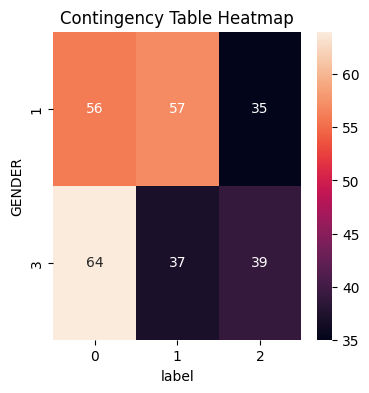

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [131]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.7863
Degrees of Freedom:       2
p-value:                  9.1340e-02

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       61.67  48.31  38.03
3       58.33  45.69  35.97


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(gender) is **not** significantly different across different clusters.

### Politics

In [132]:
# Create a contingency table
contingency_table = pd.crosstab(politics['POLITICAL'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.5510
Degrees of Freedom:       8
p-value:                  8.0431e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          13.04  10.05   7.91
2          40.81  31.44  24.75
3          49.22  37.92  29.86
4          15.14  11.67   9.19
5           3.79   2.92   2.30


* Assumption is met regarding the expected frequency

In [134]:
# Create a contingency table
contingency_table = pd.crosstab(politics['POLITICAL'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("politics, Chi-squared test p-value:", p)

politics, Chi-squared test p-value: 0.8043113293671343


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(politics) is **not** significantly different across different clusters.

### Education

In [135]:
# Create a contingency table
contingency_table = pd.crosstab(education['EDUCATION'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    21.1865
Degrees of Freedom:       8
p-value:                  6.6681e-03

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          31.97  24.63  19.39
3          21.88  16.86  13.27
4          45.01  34.68  27.30
5          22.30  17.18  13.52
6           0.84   0.65   0.51


* Assumption(Expected frequency) almost it is met, let's go furthre without cutting off the dataset

In [136]:
# Create a contingency table
contingency_table = pd.crosstab(education['EDUCATION'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("education, Chi-squared test p-value:", p)

education, Chi-squared test p-value: 0.006668102988161206


p is below 0.05 -> reject the null-hypothesis

**Result:**
The distribution of the feature(education) **is significantly different** across different clusters.

### Employment

In [137]:
# Create a contingency table
contingency_table = pd.crosstab(employment['EMPLOYMENT'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    19.0646
Degrees of Freedom:       14
p-value:                  1.6249e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           45.43  35.01  27.56
2           16.83  12.97  10.21
3            5.47   4.21   3.32
4           18.09  13.94  10.97
5            6.73   5.19   4.08
6            5.89   4.54   3.57
7           17.25  13.29  10.46
8            6.31   4.86   3.83


### Assumption not met -> cut off the dataset

In [138]:
contingency_table_filtered = contingency_table.loc[[1, 2, 4, 5, 7]]

In [139]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[44.85483871 33.53225806 29.61290323]
 [16.61290323 12.41935484 10.96774194]
 [17.85887097 13.35080645 11.79032258]
 [ 6.64516129  4.96774194  4.38709677]
 [17.02822581 12.72983871 11.24193548]]
Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.


* Assumption is met regarding the expected frequency

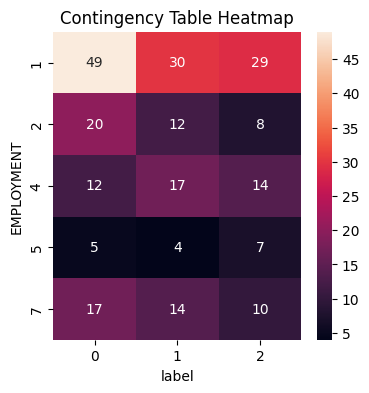

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [141]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.0253
Degrees of Freedom:       8
p-value:                  4.3101e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           44.85  33.53  29.61
2           16.61  12.42  10.97
4           17.86  13.35  11.79
5            6.65   4.97   4.39
7           17.03  12.73  11.24


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

### Income

In [142]:
# Create a contingency table
contingency_table = pd.crosstab(income['INCOME'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.5221
Degrees of Freedom:       8
p-value:                  3.8420e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       30.29  23.34  18.37
2       46.70  35.98  28.32
3       23.98  18.48  14.54
4       16.41  12.64   9.95
5        4.63   3.57   2.81


* Assumption(Expected frequency) almost it is met, let's go furthre without cutting off the dataset

In [143]:
# Create a contingency table
contingency_table = pd.crosstab(income['INCOME'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.5221
Degrees of Freedom:       8
p-value:                  3.8420e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       30.29  23.34  18.37
2       46.70  35.98  28.32
3       23.98  18.48  14.54
4       16.41  12.64   9.95
5        4.63   3.57   2.81


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

### Analysis of the ANOVA and Chi-Square test results

1. ANOVA

     1) Table of metrics - mean, var, std, cardinality, p-value:
        https://docs.google.com/spreadsheets/d/1E4k_kSAiAspQuXAbEuYquVKFuzHa5Ihz7mNryUj1jOU/edit#gid=446196028 -> update

     2) **DAT, CRT** shows the difference in means across the clusters

2. Chi-Square

: Except for the **EDUCATION**, There was no significant difference across the clusters with the distribution of the categorical features.